# Bonds and Treasury Notes of the War of 1812

By David Cho and Alexander Dubasov

## Historical Context

In the decade leading up to the War of 1812, “republican simplicity” dictated national economic and financial policy. However, in the final years before the outbreak of war, the nation’s finances and banking system were in a precarious position. Before the war, land sales and customs duties generated most of the government’s revenue. The government did not impose an income tax on its citizens. 

## Outline 
Bonds and treasury notes issued during the war, according to Richard Bayley: 

1. Six Percent Loan of 1812
3. Treasury Notes of 1812
4. Exchanged Six Percent Stock
5. Sixteen Million Loan of 1813
6. Treasury Notes of 1813
7. Seven and One-Half Million Loan of 1813
8. Treasury Notes of March, 1814 
9. Six Percent Loans of 1814
    - Ten Million Loan
    - Six Million Loan
    - Undesignated Loan
12. Mississippi Stock
13. Temporary Loan of 1814 
14. Treasury Notes of December, 1814
15. Direct-Tax Loan
16. Temporary Loan of February 1815
17. Seven Per Cent. Stock of 1815
18. Treasury Notes of 1815
19. Small Treasury Notes of 1815
20. Treasury Note Stock of 1815
21. Temporary Loan of March, 1815
22. Six Per Cent. Loan of 1815

Each mini bond/note bio includes information on 

- Features for each bond/note
- Historical context and reasons for issuance
- How was the bond marketed?
- Who bought the bonds and notes?
- Sources 

Each mini bond/note bio includes the following graphs  

- Market Price: price of bond/note on the open market over time (dataset: `BondPrice.csv`)
- Quantity: quantity outstanding of bond/note over time (dataset: `BondQuant.csv`)  


In [59]:
# Import Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import mplcursors
import numpy as np 
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
from matplotlib.ticker import FuncFormatter
bond_price = pd.read_csv("data/BondPrice.csv")
bond_quant = pd.read_csv("data/BondQuant.csv") 

%matplotlib widget

In [60]:
# reformat dataframe to create separate timestamp and price columns 
# drop NaN columns 
def melt_clean_price(df):
    # Drop columns with NaN 
    clean_df = df.dropna(axis=1) 
    df_melted = clean_df.melt(var_name='Timestamp', value_name='Price')
    df_melted = df_melted.iloc[2:].reset_index(drop=True)
    return df_melted

# Graph for price function
def graph_price(df, title):
    # convert timestamp dtype into datetime dtype
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    scatplot = sns.scatterplot(data=df, x='Timestamp', y='Price', marker='o')
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator())
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.ylabel('Market Price (Dollars)')
    plt.title(title)
    plt.grid(True)

    # Add hovering features 
    def show_hover_panel(get_text_func=None):
        cursor = mplcursors.cursor(
            scatplot, 
            hover=2,  # Transient
            annotation_kwargs=dict(
                bbox=dict(
                    boxstyle="square,pad=0.5",
                    facecolor="white",
                    edgecolor="#ddd",
                    linewidth=0.5,
                    path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
                ),
                linespacing=1.5,
                arrowprops=None,
            ),
            highlight=True,
            highlight_kwargs=dict(linewidth=2),
        )
    
        if get_text_func:
            cursor.connect(
                event="add",
                func=lambda sel: sel.annotation.set_text(get_text_func(df, sel.index)),
            )
    
        return cursor
    
    
    def on_add(df, index):
        item = df.iloc[index]
        parts = [
            f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
            f"Price: {item.Price:,.2f}",
        ]
    
        return "\n".join(parts)

    show_hover_panel(on_add) # add cursor hover features 

    plt.plot(df['Timestamp'], df['Price'])
    
    return plt # return completed figure 

In [61]:
# clean quant dataframe 
# returns a series with chosen row 
def clean_quant(quant_df):
    subset_cols = quant_df.columns[2:] 
    # Drop rows where all columns are Nan 
    temp_clean_quant_df = quant_df.dropna(how="all", subset=subset_cols).dropna(axis=1)
    # print(clean_six_percent_prices)
    # print(temp_clean_six_percent_quant)
    
    # Define the threshold
    threshold = 0.001
    # Function to check if all values in a column are close to zero
    def is_close_to_zero(col, threshold):
        return np.all(np.abs(col) < threshold)
    
    cols_to_drop = [col for col in temp_clean_quant_df.iloc[:, 2:].columns if is_close_to_zero(temp_clean_quant_df[col], threshold)]
    
    # Drop the columns
    clean_quant_df = temp_clean_quant_df.drop(columns=cols_to_drop)
    return clean_quant_df
    # print(clean_quant_df) 

def reformat_quant(clean_quant_df, row):
    # reformat dataframe to include timestamp and quant columns 
    series_data = clean_quant_df[clean_quant_df["Series"] == row].melt(var_name='Timestamp', value_name='Quant')
    series_data = series_data.iloc[2:].reset_index(drop=True)
    series_data['Timestamp'] = pd.to_datetime(series_data['Timestamp']) #convert timestamp column to a datetime object 
    return series_data # return the selected row 

# graphing function
def graph_quant(df, title, axis):
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    # lineplot = sns.lineplot(data=df, x="Timestamp", y="Quant") 
    scatplot = sns.scatterplot(data=df, x='Timestamp', y='Quant', marker='o')
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator(2))
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # reformat y-axis to be in millions, not tens of millions
    if axis == "mil":
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6)))
        plt.ylabel('Total Outstanding (millions)')
    elif axis == "ht": 
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e5)))
        plt.ylabel('Total Outstanding (hundred thousands)')

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.title(title)
    plt.grid(True)

        # Add hovering features 
    def show_hover_panel(get_text_func=None):
        cursor = mplcursors.cursor(
            scatplot, 
            hover=2,  # Transient
            annotation_kwargs=dict(
                bbox=dict(
                    boxstyle="square,pad=0.5",
                    facecolor="white",
                    edgecolor="#ddd",
                    linewidth=0.5,
                    path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
                ),
                linespacing=1.5,
                arrowprops=None,
            ),
            highlight=True,
            highlight_kwargs=dict(linewidth=2),
        )
    
        if get_text_func:
            cursor.connect(
                event="add",
                func=lambda sel: sel.annotation.set_text(get_text_func(df, sel.index)),
            )
    
        return cursor
    
    
    def on_add(df, index):
        item = df.iloc[index]
        parts = [
            f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
            f"Quant: {item.Quant:,.2f}",
        ]
    
        return "\n".join(parts)

    show_hover_panel(on_add) # add cursor hover features 
    
    plt.plot(df['Timestamp'], df['Quant'])
    return plt

# Add a historical marker
# An important event 
def add_marker(axis, event_str, date, price):
    axis.annotate(event_str,
            xy=(pd.Timestamp(date), price), xycoords='data',
            xytext=(30, 10), textcoords='offset points', size=8, 
            arrowprops=dict(facecolor='black', shrink=0.05))

# color background to define a period
def add_period(plot, begin, end):
    # ax.text(pd.Timestamp("1820-06"), 90, 'Panic of 1819', horizontalalignment='center')
    plot.axvspan(xmin=pd.Timestamp(begin), xmax=pd.Timestamp(end), fc="#E0837F")

<h2 id="six-percent-loan-of-1812">Six Percent Loan of 1812</h2>

### Overview and Features: Six Percent Loan of 1812
1. Authorized By: <i>Act of March 14, 1812</i> (three months before war)
2. President can borrow <b>no more</b> than \$ 11 million.
3. Interest Rate: 6%
    - Most government bonds had an interest rate of 5%-6% since 1801 [2] 
5. Payment Frequency: Quarterly
6. 12-year loan (reimbursable on January 1, 1825)
7. Final Redemption: March 12, 1833 
8. Buyers could not sell stock certificates below par value.
9. The Treasury obtained <b>\$ 8,134,700</b> through issuing these stock certificates.

### Overview and Features: Temporary Loan of 1812 
Congress authorized \\$ 11 million through an act on March 14, 1812, the same act that authorized the six percent loan of 1812. Bonds were redeemable based on contracts. Sold at par and at 6% interest in quarterly payments. The final redemption occured on June 28, 1817. Around \$2,150,000 was obtained under special contracts with various banks according to Bayley [1]. 

### Marketing 
1. Overview: Not many nanks and individuals were not interested in buying government debt 
2. Unimpressive: The modest interest rate (6%) did not excite many buyers.
3. The war question: Potential buyers did not buy because they were nervous that the United States could suffer defeat against Britain (the largest army and navy).
4. Lack of a market: Primarily regional securities markets
5. Lack of capability: American firms could not underwrite large securities issues, and American agents in Europe could not underwrite American securities issues.
6. The "solution": Due to the lack of capability, the Treasury announced the bonds and simply waited for investors to come.  
7. Consequences: Due to the lack of subscribers, Congress issued \$5 million worth of treasury notes (Treasury Notes of 1812).

### Who Bought Them? 
1. \$4.2 million bought by banks for their long-term portfolios.
2. \$2.0 million bought by individuals.
3. Attempts at better marketing: Gallatin (Treasury Secretary) wanted to increase interest rates from 6% and sell bonds at a discount; the proposal was rejected by Madison.
4. Reasons for failure: New Englanders remained unsympathetic to the war. Congress did not find a way to fulfill interest payments. 

#### Sources
[1] Richard Bayley

[2] Dissertation (147)

[3] American Public Finance and Financial Services (327-330) 

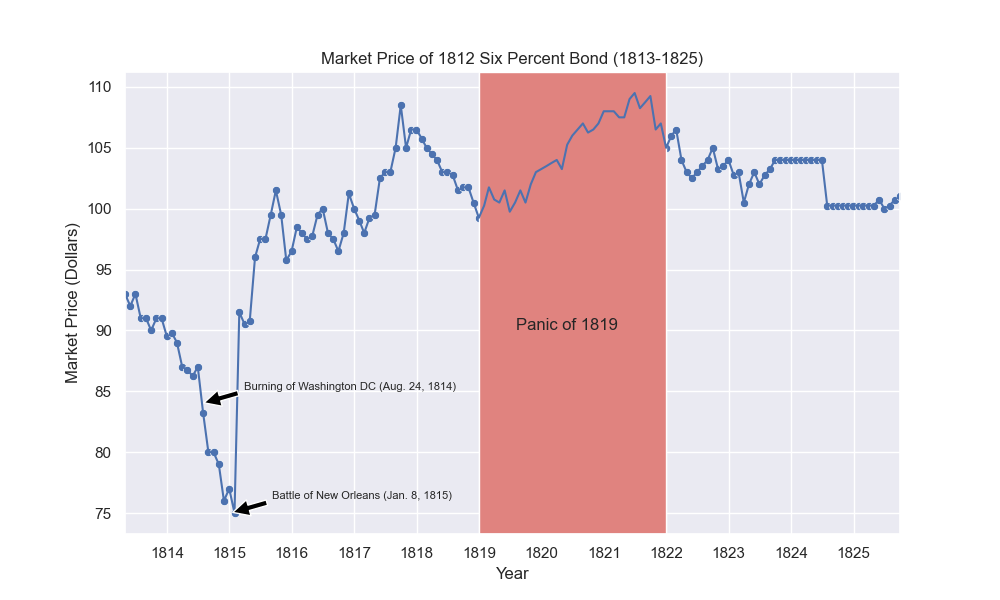

In [62]:
%matplotlib widget
# Six percent loan of 1812 
# prices 
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
six_percent_prices_melted = melt_clean_price(six_percent_prices) # clean and melt (reformat) dataframe 
six_percent_plot = graph_price(six_percent_prices_melted, 'Market Price of 1812 Six Percent Bond (1813-1825)')

# historical annotations 
add_marker(six_percent_plot, 'Burning of Washington DC (Aug. 24, 1814)', "1814-7-24", 84)
add_marker(six_percent_plot, 'Battle of New Orleans (Jan. 8, 1815)', "1815-1-08", 75) 
# Panic of 1819 
add_period(six_percent_plot, "1819", "1822")
six_percent_plot.text(pd.Timestamp("1820-06"), 90, 'Panic of 1819', horizontalalignment='center')

six_percent_plot.show()

Prices dipped substantially during the latter half of 1814. From the end of June, 1814 to the end of January, 1815, prices decreased by 13.79%. The decrease in price coincides with the British Chesapeake campaign which saw the burning of Washington DC. The uptick in prices after January, 1815 can be explained by the signing of the Treaty of Ghent, ending the war. The market price reached a maximum of \\$ 109.50 by the end of June, 1822. The period from 1819 to the latter half of 1822 saw an increase in the price, coinciding with the Panic of 1819 and the ensuing financial crisis. 

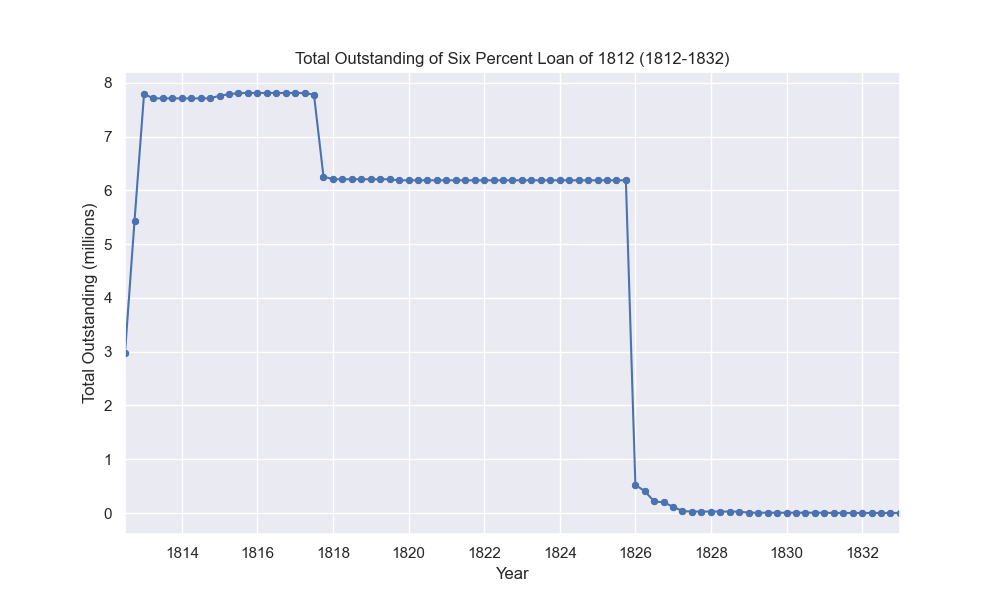

In [63]:
# quantities 
six_percent_quant = bond_quant[bond_quant["L1 ID"] == 20048]
clean_six_percent_quant = clean_quant(six_percent_quant)
#print(clean_six_percent_quant) 
total_outstanding = reformat_quant(clean_six_percent_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Six Percent Loan of 1812 (1812-1832)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_six_percent_quant, "Public Holdings")
#public_holdings.show()
# print(public_holdings.equals(total_outstanding))

First quantity record shows a total outstanding of approximately 3 million at the end of June 1813. By the end of 1813, total oustanding increases to 7.7 million. Slight uptick at the end of 1814, at the war's conclusion. Quantity drops from 7.78 million to 6.26 million between July and September of 1817; 19.57% decrease (-\\$ 1,522,048); according to Bayley, the commissioners of the sinking fund purchased \\$ 1,603,997. There was a 91.57% decrease in total outstanding from October to December 1825; most likely cause were that bonds became redeemable starting January, 1825. The maximum quantity outstanding was \\$ 7,810,500, way below the \\$ 11 million authorized by Congress, showcasing the lackluster success of the loan. 

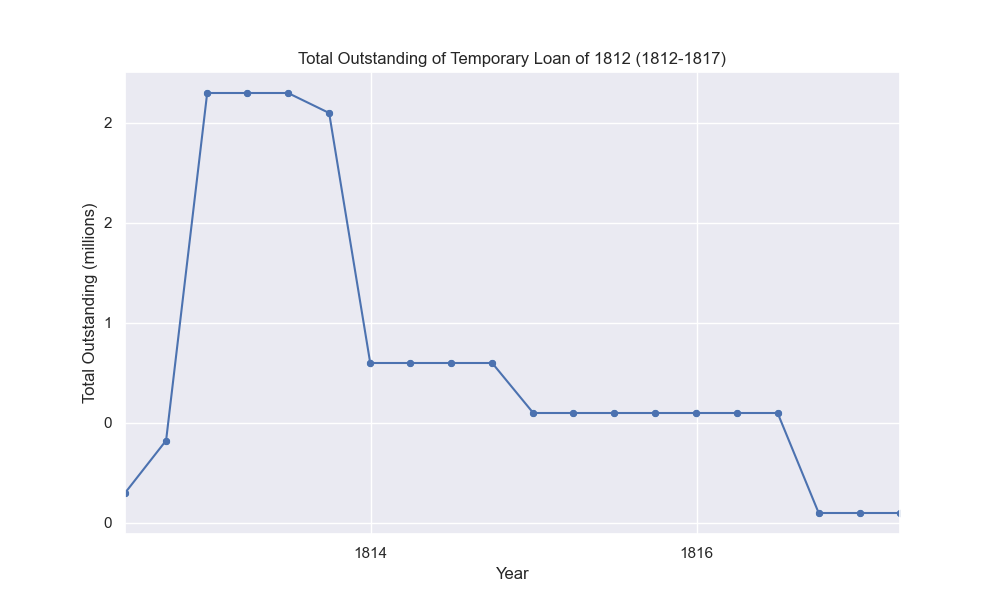

In [64]:
# temporary loan of 1812 
# prices - no price data 
"""
temp_loan_1812_prices = bond_price[bond_price["L1 ID"] == 20049] 
temp_loan_1812_prices_melted = melt_clean_price(temp_loan_1812_prices) # clean and melt (reformat) dataframe 
print(temp_loan_1812_prices_melted)
temp_loan_1812 = graph_price(temp_loan_1812_prices_melted, 'Market Price of Temporary Loan of 1812 (1813-1825)')
temp_loan_1812.show()
"""

# quantities 
temp_loan_1812_quant = bond_quant[bond_quant["L1 ID"] == 20049]
clean_temp_loan_1812_quant = clean_quant(temp_loan_1812_quant)
total_outstanding = reformat_quant(clean_temp_loan_1812_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Temporary Loan of 1812 (1812-1817)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_temp_loan_1812_quant, "Public Holdings")
#public_holdings.show()
#print(public_holdings.equals(total_outstanding))

## Treasury Notes of 1812

### Overview and Features
1. Authorized By: <I>Act of June 30, 1812</i>
2. Why: Failure of the Six Percent Loan of 1812 to attract enough buyers and an estimated \$ 11 million deficit [2]
3. Detractors: Congressmen opposed the Treasury notes and wanted to use other revenue sources such as taxation. They argued banks and people scared of paper money would not purchase treasury notes because they weren't worth as much in gold or silver and that they would appreciate like the Continental Currency during the American Revolution.
5. No more than <b>\$ 5 million</b> could be issued.
6. Interest Rate: 5.4%
7. Frequency: At maturity
8. First Issue Denominations: \\$ 100, \$ 1000
9. 1-year loan (reimbursable 1 year from date)
10. Sold: at par

### Marketing
1. Versatility: Treasury notes would be used to pay off taxes, duties, and debts.
2. Convertible: Treasury notes could now be exchanged for long-term bonds paying 7 percent interest.
3. Supporters: Silver was in short supply and gold was undervalued. Therefore, coins could not be made. Treasury notes were seen as a good replacement for the First Bank of the US's notes. Depreciation would be avoided because notes could be used to pay off taxes and banks would keep them in their reserves. 

### Who Bought Them?
1. <b>$3.5 million</b> sold to banks, mostly located in Mid-Atlantic states.
2. By December 1, the remaining bills were sold off, many going to New England.
3. Report by Treasury Secretary Alexander Dallas (1814-1816) to Congress: Treasury notes were bought primarily by "necessitous creditors, or contractors in distress, or commissaries, quartermasters, and navy agents acting officially." 
4. Usage: Kagin cites the Niles Weekly Register, who observed how banks primarily used the treasury notes as reserves, meaning they were not circulating. In his report to Congress, Secretary Dallas states most notes went towards paying taxes.
#### Sources
[1] Dissertation

[2] Richard Bayley (48-49)

[3] American Numismatic Association

[4] Monetary Aspects of the Treasury Notes of the War of 1812 by Donald H. Kagin 

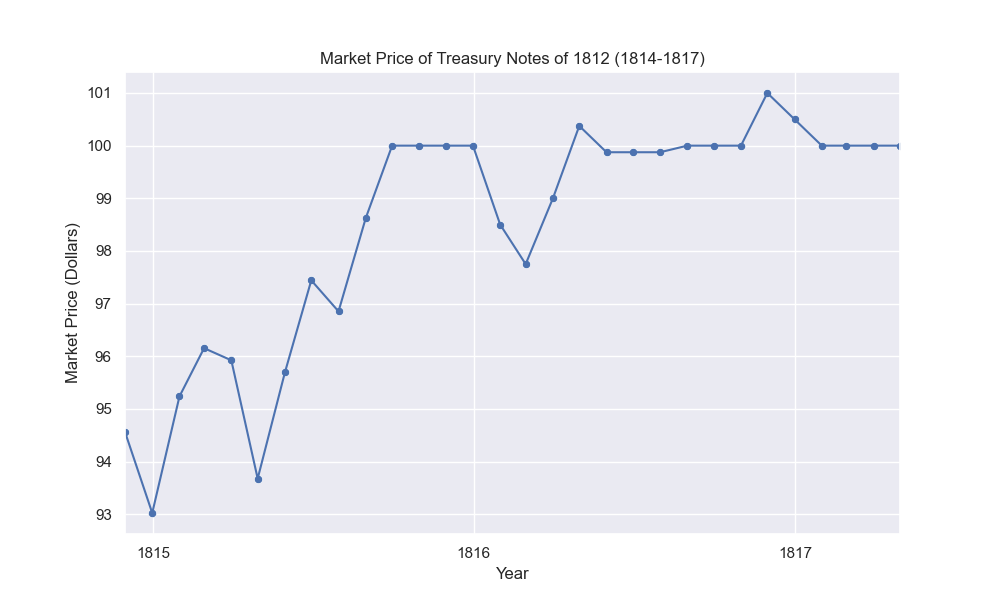

In [65]:
# treasury notes of 1812 prices 
treasure_notes_prices = bond_price[bond_price["L1 ID"] == 20050] 
treasure_notes_melted = melt_clean_price(treasure_notes_prices) # clean and melt (reformat) dataframe 
# print(treasure_notes_melted) 
treasure_notes = graph_price(treasure_notes_melted, 'Market Price of Treasury Notes of 1812 (1814-1817)')
treasure_notes.show()

Market price data starts November, 1814 despite the treasury notes being issued in 1812 and 1813. This is most likely due to the fact most of the treasury notes were redeemed quickly (little more than a year) after they were issued. The small quantity remaining was left to be traded. 

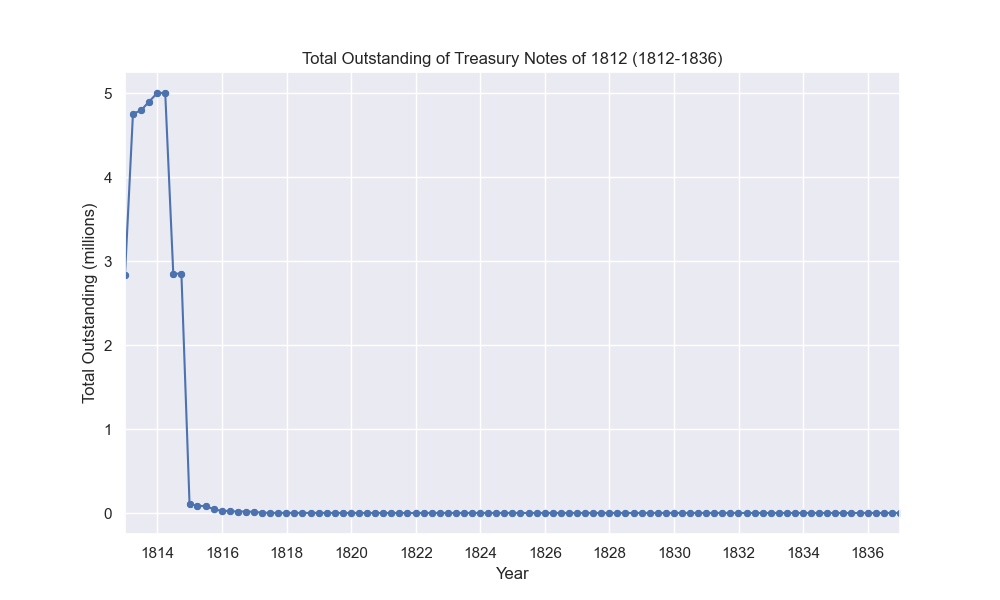

In [66]:
# quantities 
treasure_notes_1812_quant = bond_quant[bond_quant["L1 ID"] == 20050]
clean_treasure_notes_1812_quant = clean_quant(treasure_notes_1812_quant)
# print(clean_treasure_notes_1812_quant) 
total_outstanding = reformat_quant(clean_treasure_notes_1812_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of 1812 (1812-1836)", "mil") 
total_outstanding_plot.show()

The 1812 issue of treasury notes reached its authorized limit of \\$ 5 million by the end of 1813. The data aligns with Kagin's statement that "the first issue of Treasury Notes was quite successful" and that "the rest of the bills were disposed of by December 1 the following year [1813]." After March 1814, the total outstanding falls sharply. By the end of 1814, the total outstanding had decreased by 97.84%. This sharp decrease aligns with the fact that these treasury notes were meant to be short-term bonds and were redeemable after a year they were issued. 

## Exchanged Six Percent Stock

### Overview and Features
Congress authorized the exchanged six percent stock through an act on June 24, 1812. The act allowed individuals to trade in their old Six Percent stock in exchange for new six percent stock. These new stocks had the same features as the \\$ 11 million Six Percent Loan of 1812. Gallatin had noted that the \$ 11 million loan of 1816 only managed to bring in \\$ 6.46 million. Gallatin thought it would increase the price of the bonds since according to Gallatin they were selling 2-3% below par. The Treasury collected around \\$ 2,984,746 worth of subscriptions of the exchanged six percent stock [1].  

### Marketing
The act did not have any new features compared to the old six percent stock. The act explicitly protected those who purchased the old six percent stock and did not wish to subcribe to the exchanged stock [1]. 

### Who Bought Them?
The only individuals and banks who could purchase the new six percent stocks were those who already had the old six percent stock [1].

#### Sources 
[1] Richard Bayley (49)

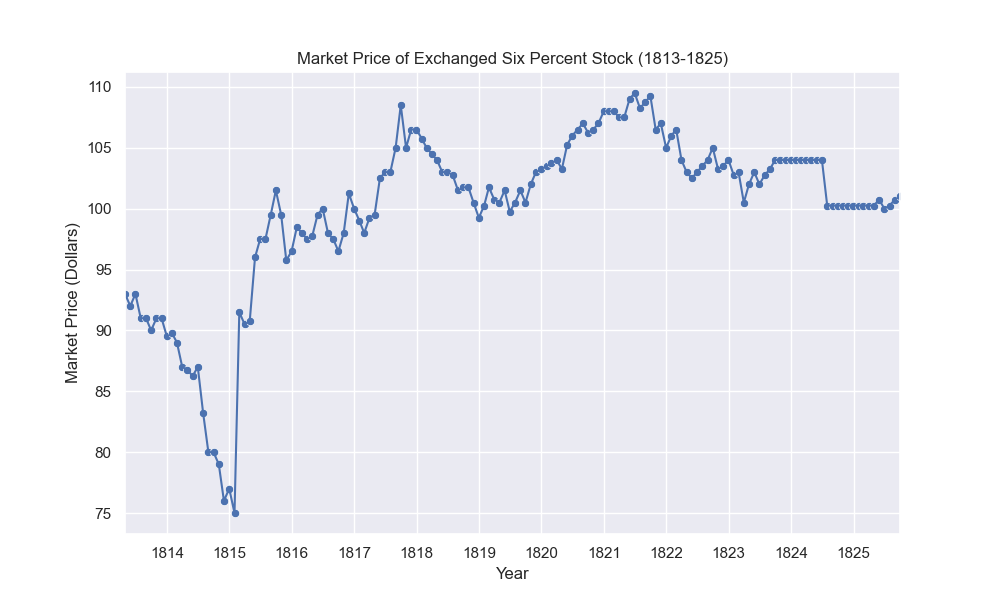

In [67]:
# Exchanged 6% stock 
exchanged_six_prices = bond_price[bond_price["L1 ID"] == 20051] 
exchanged_six_melted = melt_clean_price(exchanged_six_prices) # clean and melt (reformat) dataframe 
exchanged_six = graph_price(exchanged_six_melted, 'Market Price of Exchanged Six Percent Stock (1813-1825)') 
exchanged_six.show()

The market price graph of the exchanged six percent stock matches that of the old six percent stock since the new exchanged six percent stock kept the same features and was meant to supplement the already existing supply of old six percent stock. 

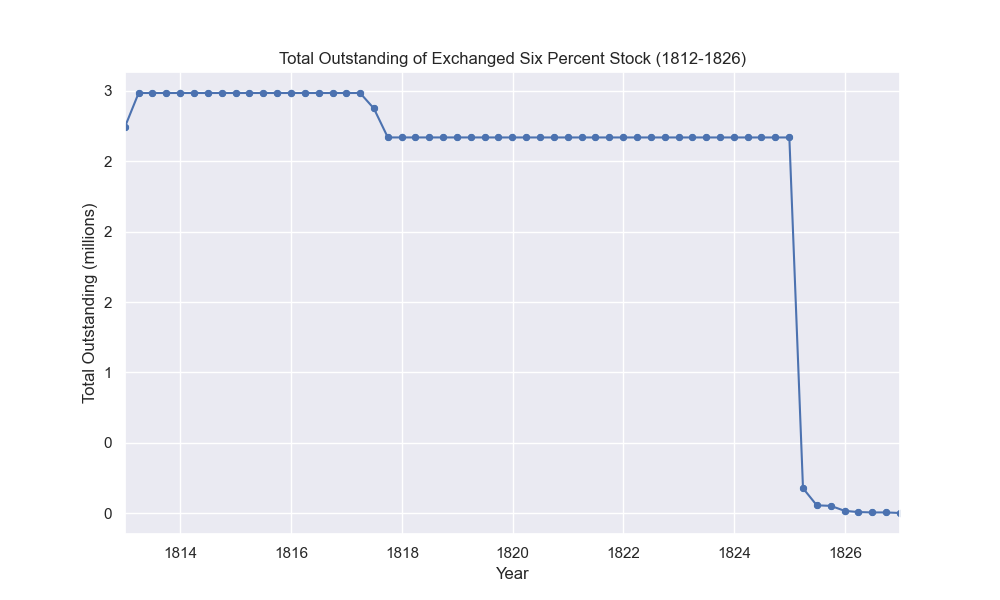

In [68]:
# quantities 
exchanged_six_quant = bond_quant[bond_quant["L1 ID"] == 20051]
clean_exchanged_six_quant = clean_quant(exchanged_six_quant)
total_outstanding = reformat_quant(clean_exchanged_six_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Exchanged Six Percent Stock (1812-1826)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_exchanged_six_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()

There is a sharp decrease in total outstanding from December, 1824 through March, 1825 from \\$ 2,668,974.99 to \$ 177,650.18, a <b>93.34% decrease</b>. The decrease was most likely caused by the fact that the stock became redeemable after December 31, 1824.  

## Sixteen Million Loan of 1813 

### Overview and Features
Congress authorized the \\$ 16 million loan on February 8, 1813. The loan was necessary since treasury notes and import duties failed to cover war expenses. The interest rate was set at 6%, payable quarterly. Bonds would be redeemable after January 1, 1826. They sold at 88 percent face value. \\$ 18,109,377.43 was issued [6]. 

### Marketing and Buyers

Banking institutions did not buy the bonds. Potential buyers were scared by America losing the war. By March, the loan had a shortfall of \$ 10 million. Therefore, Gallatin began relying on wealthy individuals to make up for the deficit. 

Stephen Girard: He was a French native, banker, and financier. He operated a private bank in Philadelphia out of the First BUS building. He remained friends with Secretary Gallatin. He agreed to help make up for the \\$ 10 million shortfall. His decision increased public confidence [2]. 

David Parish: He was an agent of a Philadelphia banking house and son of Parish and Company, a firm from Hamburg, Germany. He had experience in underwriting securities and forming syndicates [4]. He made most of his wealth from land speculation [3]. 

John Jacob Astor: He was an immigrant from Germany who lived in New York City. He made his money from the fur trade, selling opium to China, and real estate. He was the first member of the powerful Astor family to live in America [4]. He was also one of the richest men in America [5]. 

Girard, Parish, and Astor agreed to form a syndicate. They purchased \\$ 10.1 million worth of 6 percent bonds at \\$ 88 discounted. Girard and Parish's personal shares were \\$ 3.1 million and Astor's was \\$ 1.5 million. The three syndicate members hired at least seven firms from Phildadelphia, New York, and Baltimore to purchase the remaining \\$ 2.4 million. The syndicate did not bear any financial risk and they would market their combined total of \\$ 7.7 million, earning \\$ 11,510 in commissions [4].  


#### Sources
- [1] Dissertation
- [2] Girard to the Rescue: Stephen Girard and the War Loan of February 8, 1813 by Mark T. Hensen
- [3] Wikipedia on David Parish 
- [4] American Public Finance and Financial Services (331) 
- [5] Wikipedia on John Jacob Astor
- [6] Richard Bayley

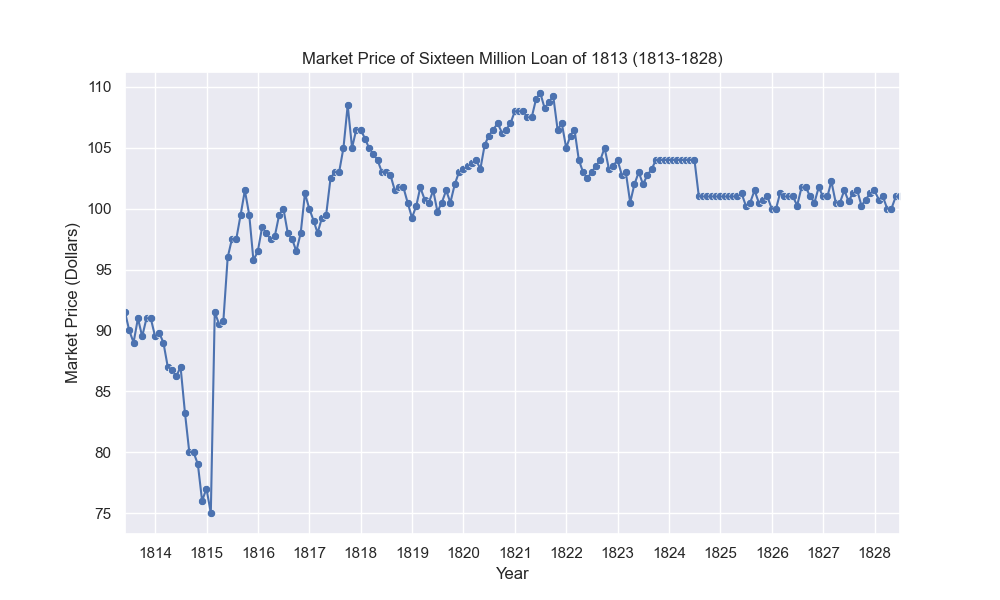

In [69]:
# Sixteen million loan of 1813 
sixteen_mil_prices = bond_price[bond_price["L1 ID"] == 20052] 
sixteen_mil_melted = melt_clean_price(sixteen_mil_prices) # clean and melt (reformat) dataframe 
sixteen_mil = graph_price(sixteen_mil_melted, 'Market Price of Sixteen Million Loan of 1813 (1813-1828)') 
sixteen_mil.show()

The market price for 1813 six percent bonds is almost identical to the 1812 six percent stock (old and exchanged). There are differences. The data for the 1813 bonds begins one month later (in June compared to May for the 1812 bonds). The data continues past 1825 since the 1813 bonds were redeemable a year later than the 1812 six percent bonds. 

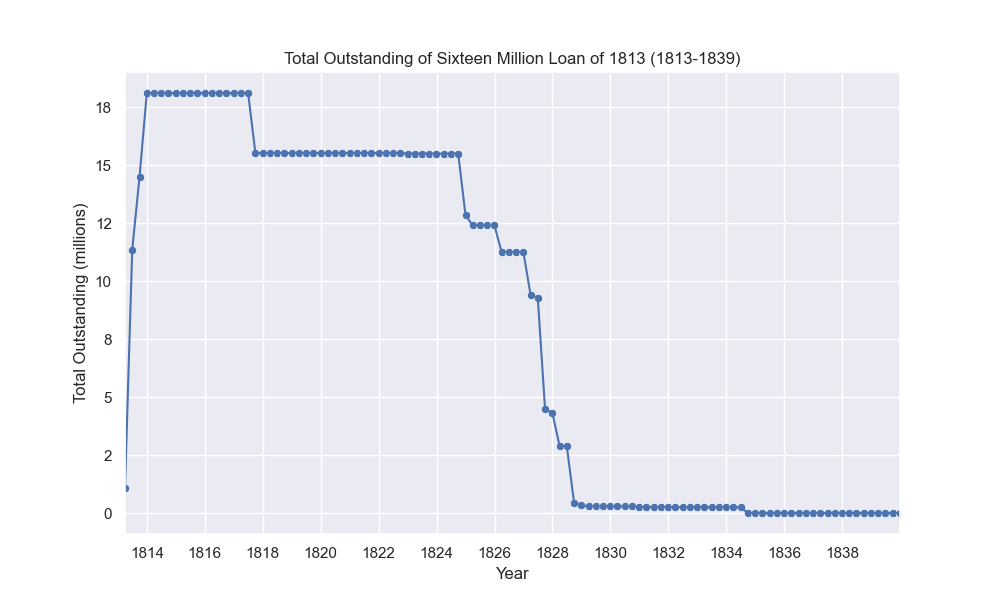

In [70]:
# quantities 
sixteen_mil_quant = bond_quant[bond_quant["L1 ID"] == 20052]
clean_sixteen_mil_quant = clean_quant(sixteen_mil_quant)
total_outstanding = reformat_quant(clean_sixteen_mil_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Sixteen Million Loan of 1813 (1813-1839)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_sixteen_mil_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
#print(public_holdings.equals(total_outstanding))

A total of \\$ 18,109,377 million was issued despite being a \\$ 16 million loan. An additional \\$ 2,109,377.43 came from the fact the bond was sold at a discount. The decrease in total outstanding from June to September 1817 overlaps with a decrease in total outstanding during that same time period for the 1812 six percent bonds (-\\$ 2,580,943.7). According to Bayley, in 1817, the commissioners of the sinking fund purchased \\$ 2,580,943.7 at par. For the other decreases in the years following, acts by Congress in 1822, 1824, and 1825 saw the amount redeemed exchanged for new interest-bearing stocks [6]. 

## Treasury Notes of 1813 

### Overview and Features 
<b>Features:</b> Congress authorized the treasury notes on February 25, 1813. They allowed the Treasury to issue no more than <b>\$ 5 million</b>. The bonds <b>sold at par</b>. Buyers could redeem them after <b>one year</b>. Congress set a fixed interest rate of <b>5.4%</b>. Agents earned a commission of 1/4th of a cent [1]. Congress only issued notes in \\$100 and \\$1000 denominations [3]. Congress allowed individuals to give their notes to another person [5]. While most treasury notes were redeemed after a year, some were converted to long-term bonds with seven percent interest [6]. 

<b>Overview:</b> Gallatin wanted to replace the treasury notes authorized in 1812 because the war effort required an additional borrowing of \\$ 19 million. Republicans refused to raise taxes. The 5 million in notes would be a part of the 16 million loan passed on Feb. 8. Congress intended these notes to supplement shortfalls in long-term loans. However, Congress did nothing to support the notes in circulation [2]. Gallatin's plan did not succeed. Madison asked Congress for an additional \$ 7.5 million [4]. 

### Marketing and Buyers
<b>Marketing:</b> Treasury Secretary Dallas stated in a report in 1815, the treasury notes issued before 1815 could not be used as a medium of exchange because Congress set the denominations too high (\\$ 100, \$ 1000), which made the early treasury notes (before 1815) unappealing for individuals. The Treasury considered the notes as legal tender. Notes also accrued short-term interest [2]. Despite the large denominations, Congress allowed individuals to give notes to each other and use notes to pay taxes, duties, and buy land anywhere. When using treasury notes to pay, the holder earned the principal amount and accrued interest [5]. 

<b>Buyers:</b> Banks used treasury notes for their reserves [2]. Since treasury notes had high denominations and could be used as payment, wealthy Americans may have bought more than average Americans. 

#### Sources
[1] Richard Bayley 

[2] <I>Monetary Aspects of the Treasury Notes of the War of 1812</I> by Donald H. Kagin

[3] Treasury notes fill gap to support War of 1812 by Paul Gilkes 

[4] <I>Financing the War of 1812</i> by Brandy Heritage Center

[5] <I>An Act authorizing the issuing of Treasury notes for the service of the year one thousand eight hundred and thirteen</I> by the Twelfth Congress

[6] American Public Finance and Financial Services (337)

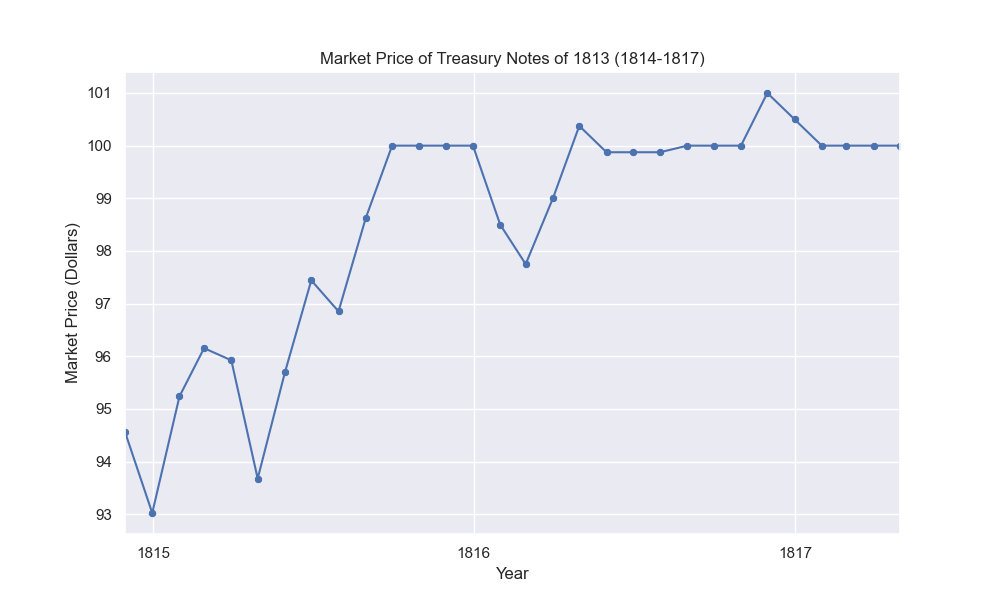

In [71]:
# Treasury Notes of 1813 
treasury_notes_1813_prices = bond_price[bond_price["L1 ID"] == 20053] 
treasury_notes_1813_melted = melt_clean_price(treasury_notes_1813_prices) # clean and melt (reformat) dataframe 
treasury_notes_1813 = graph_price(treasury_notes_1813_melted, 'Market Price of Treasury Notes of 1813 (1814-1817)') 
treasury_notes_1813.show()

The market prices of the 1813 treasury notes are the same as the 1812 treasury notes. The 1813 treasury notes were meant to replace the 1812 treasury notes. 

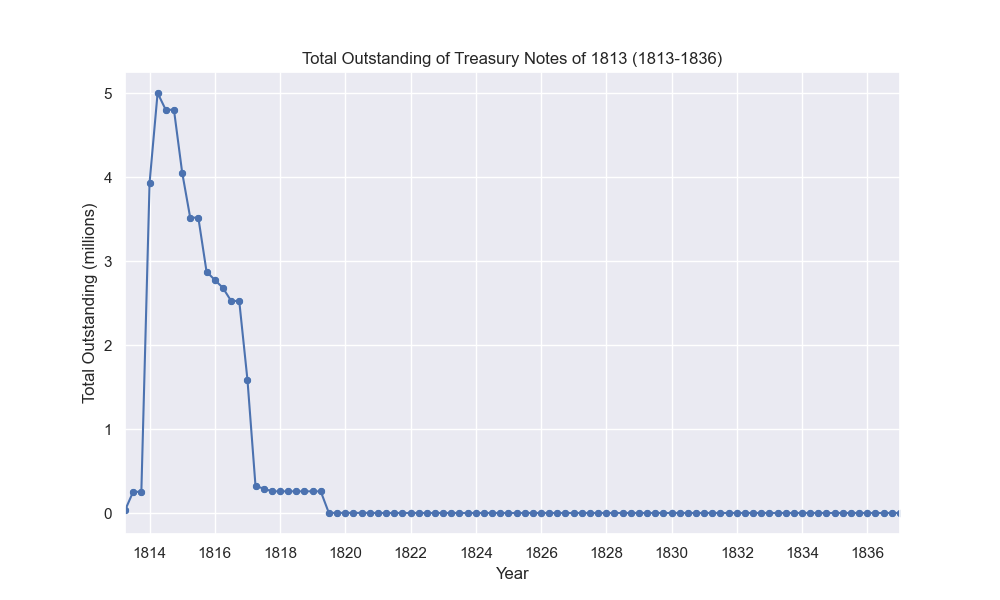

In [72]:
# quantities 
treasury_notes_1813_quant = bond_quant[bond_quant["L1 ID"] == 20053]
clean_treasury_notes_1813_quant = clean_quant(treasury_notes_1813_quant)
total_outstanding = reformat_quant(clean_treasury_notes_1813_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of 1813 (1813-1836)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_treasury_notes_1813_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()

The amount of treasury notes issued reached the maximum \$ 5 million authorized by Congress by the end of March, 1814. In the same month, the first notes could be redeemed. The quantity decreased drastically over the next three years since treasury notes were meant to be short-term loans. 

## Seven and One-Half Million Loan of 1813 

### Overview and Features
Congress authorized the loan on August 2, 1813. They authorize \\$ 7.5 million. The bonds sold at 88.25% face value, a discount. They could not be sold less than \$ 88. Buyers could redeem them after Jan. 1, 1826. Congress set a fixed interest rate of 6% and interest paid quarterly [1]. The interest rate and sell price remained identical to the terms laid out by the syndicate [4].

Secretary of the Navy William Jones became acting Treasury Secretary in May, 1814. Jones requested a long-term loan because he feared that treasury notes could depreciate [1]. Congress set aside \\$ 8 million for interest payments and reimbursement [2]. Jones sold \$ 8.5 million worth of the bonds at a discount. Gallatin stated the bonds sold quicker than the 16 million loan in 1812 [3]. According to Jones, the entire loan had been subscribed by the first months of 1814 [3]. The final redemption occurred on August 2, 1845 [1]. 

### Marketing and Buyers
Agents earned a commission of 1/4th of a cent [1]. The commission provided an incentive for individuals and banks to market the loan. The bond sold at a ~12% discount to try and attract more buyers. New England was not considered a willing market for these bonds due to opposition to the war. Southern states, south of Baltimore, did not have properly organized capital markets to facilitate these bonds. the government chose not to ask for help from outside financiers such as Girard, Astor, or Parish [4].  

#### Sources
- [1] Richard Bayley 
- [2] <I>An Act authorizing a loan for a sum not exceeding seven millions five hundred thousand dollars.</I> by Thirteenth Congress
- [3] <I>The Financial History of the War of 1812</I> by Lisa R. Morales
- [4] <I>American Public Finance and Financial Services 1700-1815</i> by Edwin J. Perkins (332) 

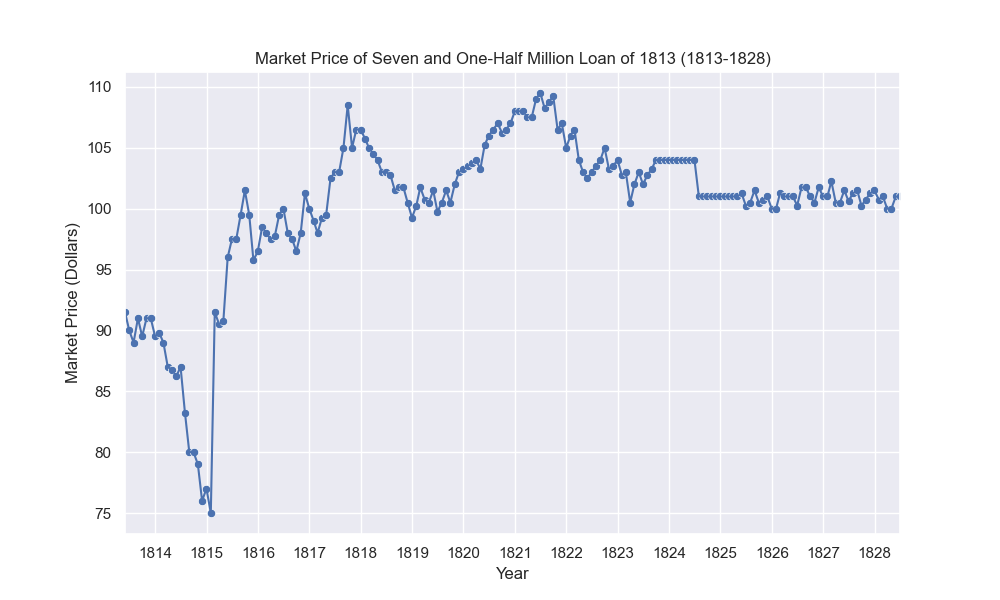

In [73]:
# seven and one-half million loan of 1813 
seven_one_half_prices = bond_price[bond_price["L1 ID"] == 20054] 
seven_one_half_melted = melt_clean_price(seven_one_half_prices) # clean and melt (reformat) dataframe 
seven_one_half = graph_price(seven_one_half_melted, 'Market Price of Seven and One-Half Million Loan of 1813 (1813-1828)') 
seven_one_half.show()

Market price of the bonds were identical to the previous Sixteen Million Loan of 1813. These bonds shared the same features and redemption date. Therefore, they must have been grouped together. 

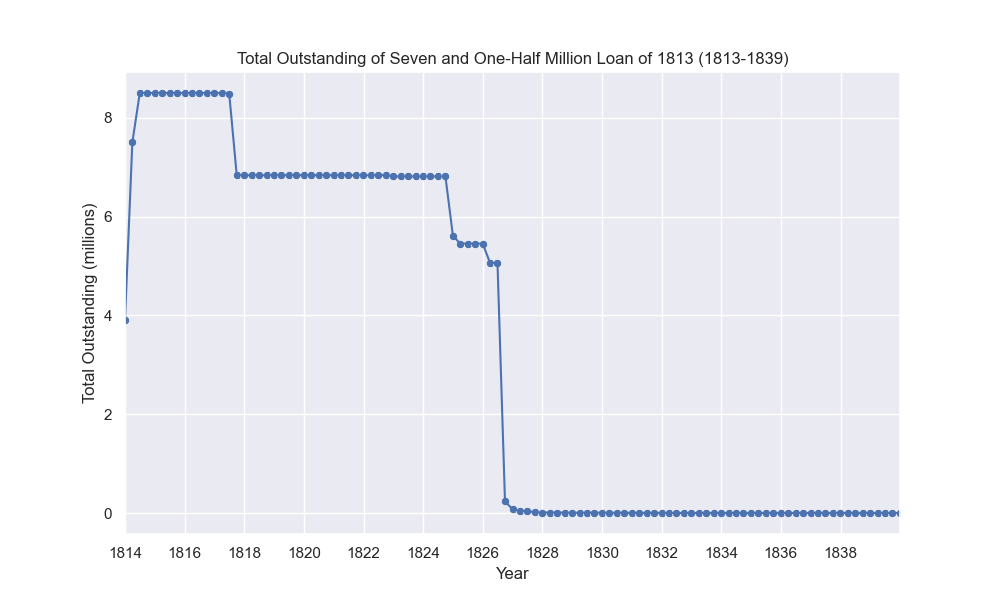

In [74]:
# quantities 
seven_one_half_quant = bond_quant[bond_quant["L1 ID"] == 20054]
clean_seven_one_half_quant = clean_quant(seven_one_half_quant)
#print(clean_seven_one_half_quant) 
total_outstanding = reformat_quant(clean_seven_one_half_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Seven and One-Half Million Loan of 1813 (1813-1839)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_seven_one_half_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()

The total outstanding follows a similar trend to the two previous long-term six percent bonds. There is a decrease in total oustanding from June to September, 1817. This aligns with Bayley's note that the comissioners of the sinking fund purchased \\$ 1,662,349.56 at par during the same time period. The comissioners of the sinking fund also purchased large amounts of the two previous long-term bonds during the same time. The following decreases in total oustanding were due to acts of Congress that exchanged the amount redeemed for new 4.5% stock in 1824, 1825, and 1826.  

## Treasury Notes of March, 1814

### Overview and Features
War expenditures had ballooned to \\$ 45.4 million with Treasury revenue only at \\$ 16 million. Congress had already authorized a \\$ 25 million loan in March 4, 1814. The \\$ 10 million worth of treasury notes were meant to be a part of that loan. Notes could be redeemed one year from date. The interest rate was set at 5.4% which would be paid on redemption. The notes sold at par. Similar to previous issues, these treasury notes could be used to pay taxes, duties, or purchase public lands [1]. The notes came in three denominations: \\$ 1000, \\$ 100, and \\$ 20 [2]. 

### Marketing and Buyers 
Agents were given a commission of 1/4th of one percent sold. The Treasury Secretary noted that the notes were popular for the following reasons: buyers were confident they would be reimbursed at the end of the year and their usefulness as a currency for what he called "remittances and other economical operations" [1]. The \\$ 20 denominations were intended to be used as hand currency so more money could end up in circulation, but the Treasury Secretary specifically avoided making the notes legal tender. In the end, large numbers of these treasury notes would not end up in circulation as intended [2]. Buyers also had the option of converting the notes in long-term seven percent interest bonds which helped maintain the value of the notes, unlike the Continental Currency, making them more stable and, therefore, appealing [3]. 

#### Sources 
- [1] Richard Bayley 
- [2] <i>Monetary Aspects of the Treasury Notes of the War of 1812</i> by Donald H. Kagin (78-79) 
- [3] American Public Finance and Financial Services (330) 

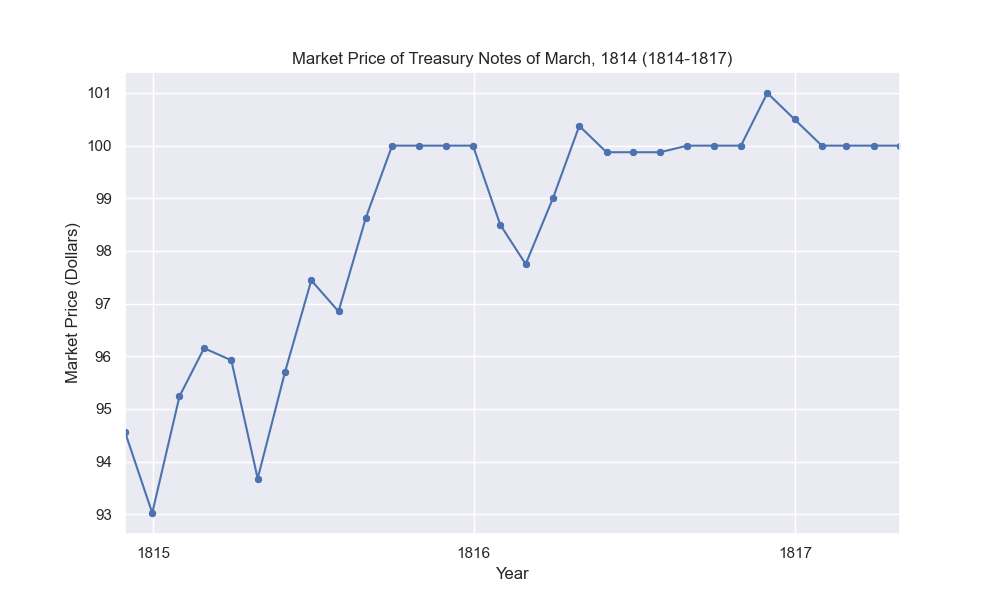

In [75]:
# treasury notes of March, 1814
notes_1814_prices = bond_price[bond_price["L1 ID"] == 20055] 
notes_1814_melted = melt_clean_price(notes_1814_prices) # clean and melt (reformat) dataframe 
notes_1814 = graph_price(notes_1814_melted, "Market Price of Treasury Notes of March, 1814 (1814-1817)")  
notes_1814.show()

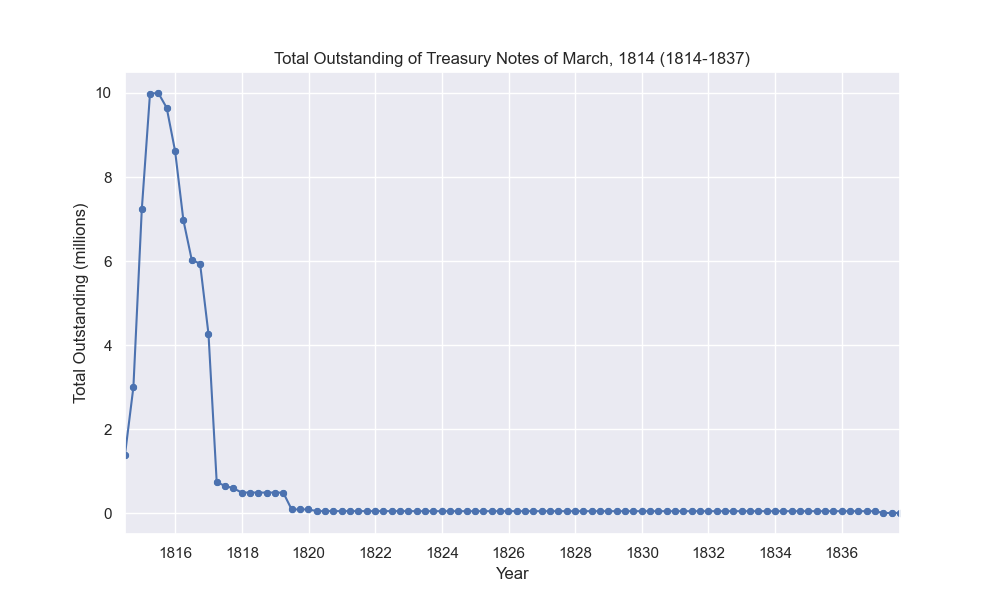

In [76]:
# quantities 
notes_1814_quant = bond_quant[bond_quant["L1 ID"] == 20055]
clean_notes_1814_quant = clean_quant(notes_1814_quant)
#print(clean_seven_one_half_quant) 
total_outstanding = reformat_quant(clean_notes_1814_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of March, 1814 (1814-1837)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_notes_1814_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()

Most treasury notes were redeemed in the latter half of 1815 and through 1816 since these treasury notes were meant to be short-term. The significant quantity of notes after 1820, relative to the previous two issues of notes, can be explained by the fact there were three denominations instead of two. By the 1830s, quantity typically decreases by \\$ 20, implying that \\$ 20 notes are still being redeemed. 

## Six Percent Loans of 1814

### Overview and Features
In 1814, the Treasury reported an estimated \\$ 29.4 million deficit. In addition, previous funds raised from bonds in 1813 had all been used up in fighting in Canada. Therefore, Congress authorized a long-term loan of \$ 25 million on March 24, 1814. Different amounts of the loan would be raised at different times to hopefully greater success [1].  

<b>Ten Million Stock:</b>
It was redeemable after December 31, 1826. It sold at a discount of 80 percent face value. Interest rate was set at 6 percent in quarterly payments on January, April, July, and October. Agents received a commission of 0.0025 times the amount sold. Congress appropriated \$ 8 million to reimburse and pay interest on the loan. 
Amount of Stock Issued (Ten Million Loan): <b>\$ 9,919,476.25</b> [1].

<b>Six Million Stock:</b>
Same features as the Ten Million Stock. 
Amount of Stock Issued (Six Million Loan): <b>\$ 5,384,134.87</b> [1].

<b>Undesignated Stock</b>
For the most part, the same features as the Six Million and Ten Million Stock. However, stocks sold anywhere between 80-95% face value. 
Amount of Stock Issued (Undesignated Loan): <b>\$ 746,403.31</b>
[1] 

### Marketing and Buyers 
<b>Ten Million Loan:</b> Treasury Secretary George W. Campbell realized he would struggle to raise \\$ 25 million at once. He decided to raise \\$ 10 million first. He received offers totaling \\$ 11.9 million without relying on loan contractors. He sold \\$ 9.2 million at \$ 88 per subscription. He ignored the remaining \\$ 2.7 million since they offered less per subscription [1][2].

Jacob Barker, a successful New York merchant, purchased \$ 5 million worth of bonds (half of the total issue). Barker used a leveraged transaction to buy them; Barker sought loans from banks in the northeast to purchase the bonds and used the bonds as collateral [2]. 

<b>Six Million Loan:</b> A new proposal of \$ 6 million was offered beginning July 25, 1814. Bonds were sold at a discount of 20 percent. Due to the discount, the Treasury offered a rebate to the original buyers of the Ten Million Loan at a rate of \\$ 10 per hundred of stock held. Thus, the Treasury protected initial buyers from the price decrease. Agents earned commissions of 1/4th of one percent on any subscriptions over \\$ 25000 [1]. 

In terms of who took the stock, Six Philadelphia banks took \\$ 250,000 for Philadelphia's military defenses. Seven Baltimore banks took \\$ 675,000 for their city's defenses [1]. British forces would capture Washington DC that August and launch an assault on Baltimore in September [5]. The corporation of New York City subscribed to \\$ 1,100,000.87 worth of stocks for supplies and reinforcements of the city. Bayley also mentions the Baltimore committee of vigilance and safety and the Planters' Bank of Savannah as buyers [1]. Overall, the six million stock failed to sell due to the British invasion during the Chesapeake campaign. Therefore, \\$ 3 million were sent to Europe for sale, most likely to David Parish in Hamburg, Germany [2]. 

<b>Undesignated Loan:</b> Subscriptions were obtained through contracts with corporations and banks. The contracts would have allowed specific terms to be negotiated, such as price. 

Several corporations in Baltimore subscribed to \\$ 150,000 of bonds to build a steam frigate to defend the city's port. The Bank of Pennsylvania subscribed to \\$ 43,222. The Bank of Columbia subscribed to \\$ 25000 and \\$ 100,000 from the Mechanics' Bank of Alexandria. \
Bank of Columbia: located in the Washington DC (District of Columbia) \
Bank of Pennsylvania: established in 1793 and located in Philadelphia [4]. <br> 
Mechanics' Bank of Alexandria: chartered by Congress [2]; first incorporated in Alexandria, Virginia by an act of Congress in 1812 [3] 

#### Sources
- [1] Richard Bayley 
- [2] <i>American Public Finance and Financial Services 1700-1815</i> by Edwin J. Perkins (334)
- [3] <i>An Act to incorporate a Bank in the town of Alexandria, by the name and style of the Mechanics' Bank of Alexandria</i> by Twelfth Congress
- [4] Klein, Philip Shriver; Ari Hoogenboom (1973). A History of Pennsylvania. Penn State Press. p. 223.
- [5] Battle of Baltimore by National Park Service

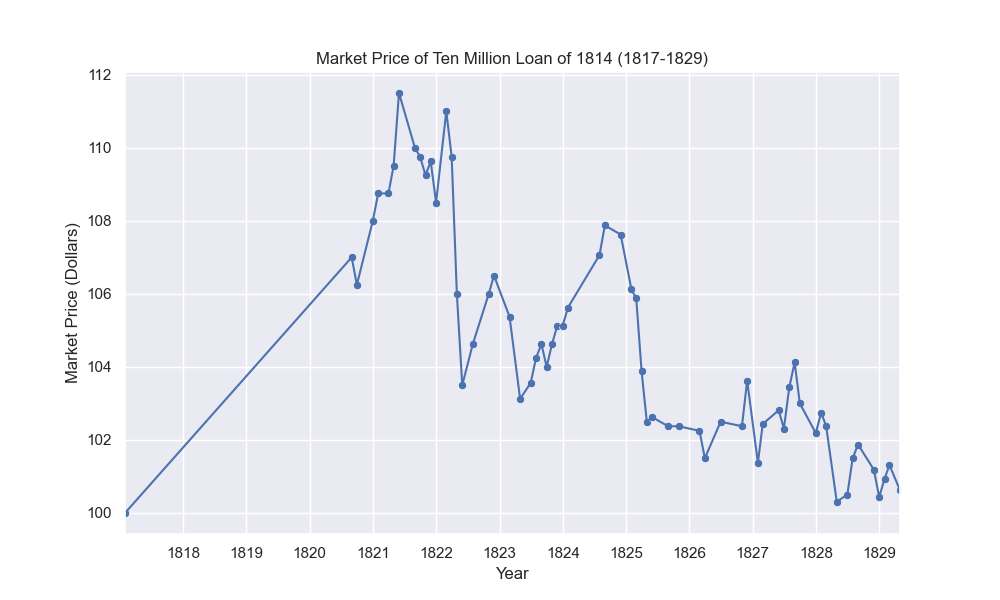

In [77]:
# 10 mil loan of 1814 
ten_mil_prices = bond_price[bond_price["L1 ID"] == 20056] 
ten_mil_melted = melt_clean_price(ten_mil_prices) # clean and melt (reformat) dataframe 
ten_mil = graph_price(ten_mil_melted, "Market Price of Ten Million Loan of 1814 (1817-1829)")  
ten_mil.show()

Since all three stocks were technically issued as part of one larger \$ 25 million loan, the market price of all three are the same. 

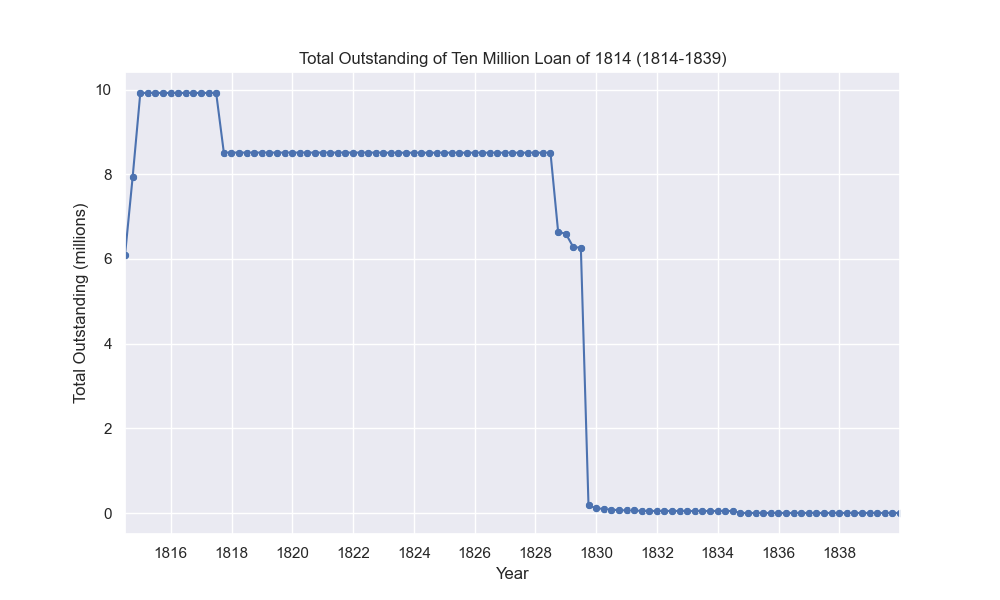

In [78]:
# quantities 
ten_mil_quant = bond_quant[bond_quant["L1 ID"] == 20056]
clean_ten_mil_quant = clean_quant(ten_mil_quant)
total_outstanding = reformat_quant(clean_ten_mil_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Ten Million Loan of 1814 (1814-1839)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_ten_mil_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()

### Six Million Loan of 1814

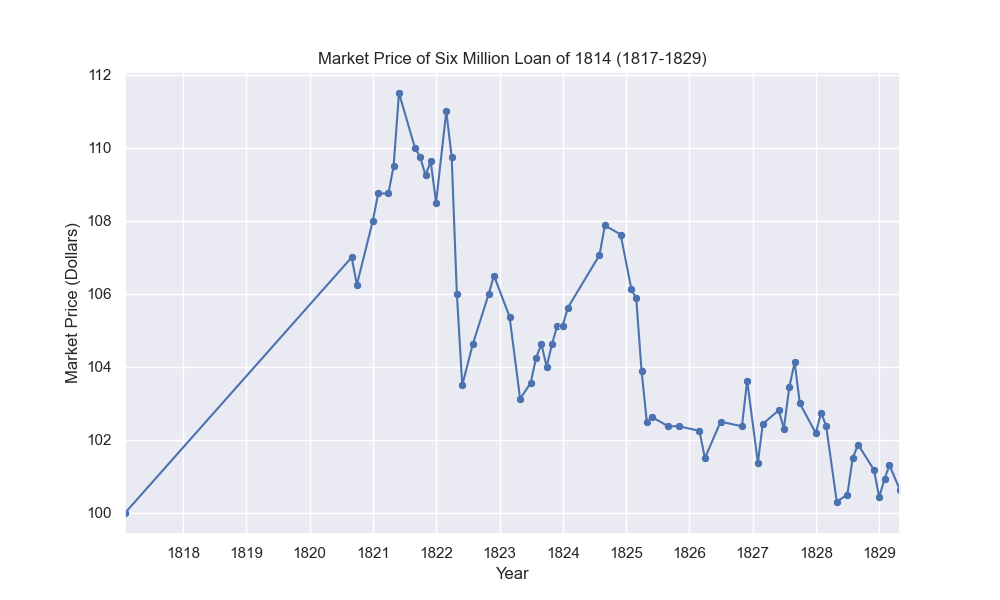

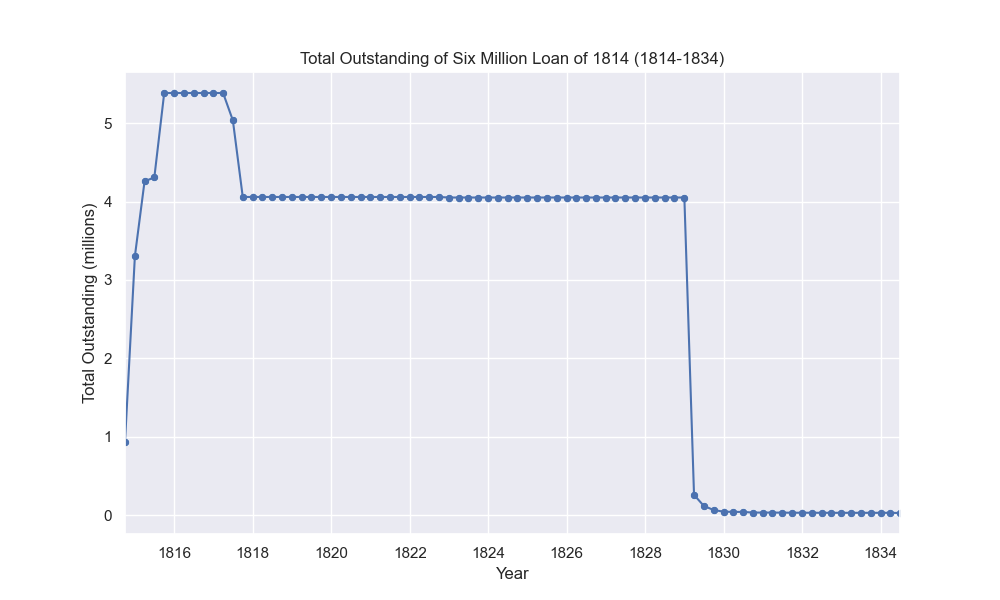

In [79]:
# Six Million Loan of 1814 
six_mil_1814_prices = bond_price[bond_price["L1 ID"] == 20057] 
six_mil_1814_melted = melt_clean_price(six_mil_1814_prices) # clean and melt (reformat) dataframe 
six_mil_1814 = graph_price(six_mil_1814_melted, "Market Price of Six Million Loan of 1814 (1817-1829)")  
six_mil_1814.show()

# quantities 
six_mil_1814_quant = bond_quant[bond_quant["L1 ID"] == 20057]
clean_six_mil_1814_quant = clean_quant(six_mil_1814_quant)
total_outstanding = reformat_quant(clean_six_mil_1814_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Six Million Loan of 1814 (1814-1834)", "mil") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_six_mil_1814_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()

### Undesignated Loan of 1814 

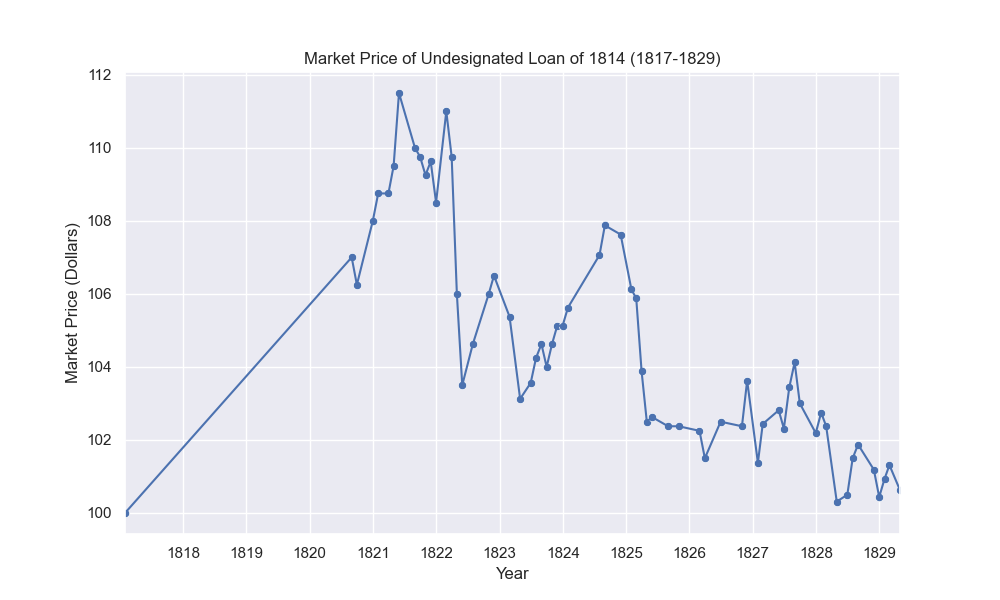

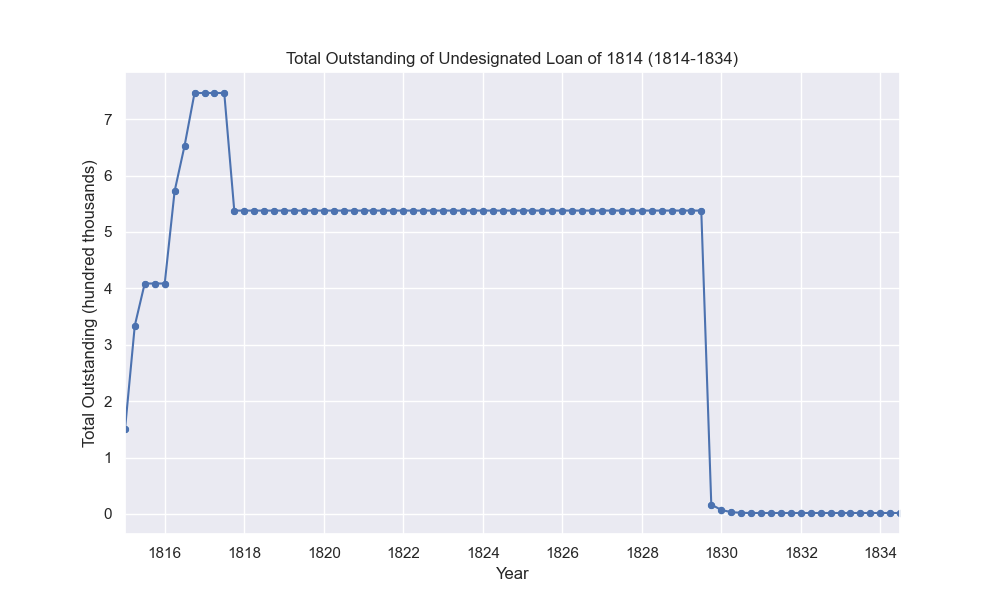

True


In [89]:
# Undesignated Loan of 1814
undesignated_1814_prices = bond_price[bond_price["L1 ID"] == 20058] 
undesignated_1814_melted = melt_clean_price(undesignated_1814_prices) # clean and melt (reformat) dataframe 
undesignated_1814 = graph_price(undesignated_1814_melted, "Market Price of Undesignated Loan of 1814 (1817-1829)")  
undesignated_1814.show()

# quantities 
undesignated_1814_quant = bond_quant[bond_quant["L1 ID"] == 20058]
clean_undesignated_1814_quant = clean_quant(undesignated_1814_quant)
total_outstanding = reformat_quant(clean_undesignated_1814_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Undesignated Loan of 1814 (1814-1834)", "ht") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_undesignated_1814_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

     Timestamp
0   1813-05-31
1   1813-06-30
2   1813-07-31
3   1813-08-31
4   1813-09-30
..         ...
177 1828-02-29
178 1828-03-31
179 1828-04-30
180 1828-05-31
181 1828-06-30

[182 rows x 1 columns]


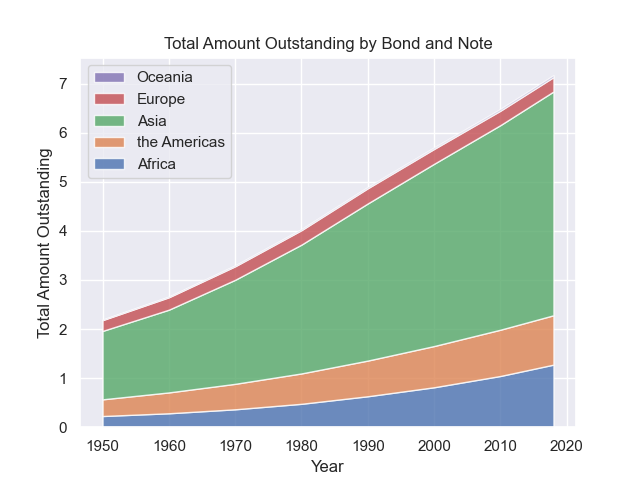

In [97]:
# Close all plots 
plt.clf()
print(sixteen_mil_melted)
#print(treasure_notes_melted)
print(pd.merge(sixteen_mil_melted["Timestamp"], treasure_notes_melted["Timestamp"], how="outer"))
  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'Africa': [.228, .284, .365, .477, .631, .814, 1.044, 1.275],
    'the Americas': [.340, .425, .519, .619, .727, .840, .943, 1.006],
    'Asia': [1.394, 1.686, 2.120, 2.625, 3.202, 3.714, 4.169, 4.560],
    'Europe': [.220, .253, .276, .295, .310, .303, .294, .293],
    'Oceania': [.012, .015, .019, .022, .026, .031, .036, .039],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('Total Amount Outstanding by Bond and Note')
ax.set_xlabel('Year')
ax.set_ylabel('Total Amount Outstanding')
# add tick at every 200 million people
ax.yaxis.set_minor_locator(mticker.MultipleLocator(.2))

plt.show()